# Numpy을 활용하여 머신러닝 - K-Means 군집화
*Objective*
* K-Means 알고리즘 개괄 : 대표적인 군집화 방법론 중 하나인 K-Means 알고리즘을 이해합니다.
* K-Means 알고리즘 구현 : K-Means 알고리즘을 Numpy로 구현해봅니다.


In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# [1. K-Means 알고리즘 개괄 ]
K-Means 알고리즘은 주어진 데이터를 K개의 클러스터로 묶는 '군집화 알고리즘' 중 하나로, 각 클러스터의 중심과 각 데이터 간의 거리 차이의 분산을 최소화하는 방식으로 데이터가 속할 군집을 묶어나갑니다.

우선 예제 데이터를 준비합시다.

예제 데이터를 시각화해봅시다.

In [97]:
dataset = np.array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137],
       [ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 4.208187,  2.984927],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 2.831667,  1.574018],
       [-0.790153,  3.343144],
       [ 2.943496, -3.357075],
       [-3.195883, -2.283926],
       [ 2.336445,  2.875106],
       [-1.786345,  2.554248],
       [ 2.190101, -1.90602 ],
       [-3.403367, -2.778288],
       [ 1.778124,  3.880832],
       [-1.688346,  2.230267],
       [ 2.592976, -2.054368],
       [-4.007257, -3.207066],
       [ 2.257734,  3.387564],
       [-2.679011,  0.785119],
       [ 0.939512, -4.023563],
       [-3.674424, -2.261084],
       [ 2.046259,  2.735279],
       [-3.18947 ,  1.780269],
       [ 4.372646, -0.822248],
       [-2.579316, -3.497576],
       [ 1.889034,  5.1904  ],
       [-0.798747,  2.185588],
       [ 2.83652 , -2.658556],
       [-3.837877, -3.253815],
       [ 2.096701,  3.886007],
       [-2.709034,  2.923887],
       [ 3.367037, -3.184789],
       [-2.121479, -4.232586],
       [ 2.329546,  3.179764],
       [-3.284816,  3.273099],
       [ 3.091414, -3.815232],
       [-3.762093, -2.432191],
       [ 3.542056,  2.778832],
       [-1.736822,  4.241041],
       [ 2.127073, -2.98368 ],
       [-4.323818, -3.938116],
       [ 3.792121,  5.135768],
       [-4.786473,  3.358547],
       [ 2.624081, -3.260715],
       [-4.009299, -2.978115],
       [ 2.493525,  1.96371 ],
       [-2.513661,  2.642162],
       [ 1.864375, -3.176309],
       [-3.171184, -3.572452],
       [ 2.89422 ,  2.489128],
       [-2.562539,  2.884438],
       [ 3.491078, -3.947487],
       [-2.565729, -2.012114],
       [ 3.332948,  3.983102],
       [-1.616805,  3.573188],
       [ 2.280615, -2.559444],
       [-2.651229, -3.103198],
       [ 2.321395,  3.154987],
       [-1.685703,  2.939697],
       [ 3.031012, -3.620252],
       [-4.599622, -2.185829],
       [ 4.196223,  1.126677],
       [-2.133863,  3.093686],
       [ 4.668892, -2.562705],
       [-2.793241, -2.149706],
       [ 2.884105,  3.043438],
       [-2.967647,  2.848696],
       [ 4.479332, -1.764772],
       [-4.905566, -2.91107 ]])

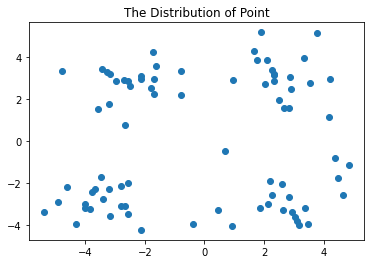

In [98]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1])
plt.show()



# [ 2.Numpy로 K-Means 구현하기 ]
K-means의 알고리즘의 순서는 다음과 같습니다:

1. 초기 중심점을 설정하기 위해 K개의 점 임의 생성
2. K개의 중심점과 각 데이터 사이의 거리 계산
3. 각 데이터를 거리가 가장 가까운 군집으로 할당
4. 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
5. 2~4의 과정을 통해 각 데이터 별 군집이 바뀌지 않았으면, 이 과정을 끝냄
6. 각 단계를 Numpy로 구현하는 코드를 작성해본 후, 전체 코드를 합쳐보겠습니다.

## 1. 각 단계별로 Numpy Code 작성하기
### (1) 초기 중심점을 설정하기 위해 K개의 점 임의 생성
예제 데이터는두 개의 축으로 표현할 수 있는 데이터입니다. K-means 알고리즘은 데이터 공간에서 임의의 점 K개(여기선 4개)를 랜덤하게 산출하는 데서 시작됩니다. 임의로 산출한다고 하지만, 임의의 중심점 4개는 데이터 셋 부근에 있어야 합니다. 따라서 데이터셋의 범위를 파악하고 그 안에서 임의의 값을 뽑아 점 4개를 생성해보겠습니다.

Numpy의 np.random을 이용하면 데이터의 최소 최대값 범위 안에서 지정한 확률 분포에 따라 임의의 값을 추출할 수 있습니다. 예를 들어 위 데이터셋에서 axis=0축 데이터의 범위 안의 수를 동일한 확률로 뽑고 싶다면, 확률 분포를 연속균등분포(uniform)으로 설정하고 샘플링을 하면 됩니다.

위와 같은 방법으로 axis=0축과 axis=1축 각각 범위 내 랜덤한 값 K개를 산출합니다.
numpy.uniform function을 사용합니다

In [108]:
center_x = np.random.uniform(-6,6,4) ## fix me ##
center_y = np.random.uniform(-6,6,4)## fix me ## 
centroids = np.stack([center_x,center_y],axis=-1)

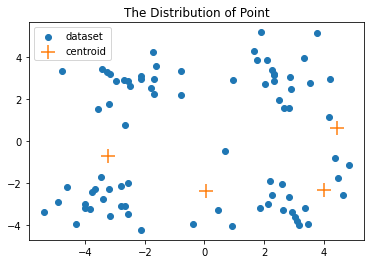

In [109]:

# 예제 데이터셋 시각화

plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()


### (2) 중심점과 각 데이터 사이의 거리를 계산
거리 공식은 KNN 때와 마찬가지로, 아래와 같습니다. 우리는 모든 중심점과 각 데이터 간 거리를 구해야 합니다.
Numpy Code의 reshape와 broadcasting을 활용하면 간결하게 나타낼 수 있습니다.

In [110]:
## numpy broadcasting 을 활용해 코드 한줄로 모든 centroids 와 모든 데이터간 거리를 계산하세요. 
dists = np.vstack([np.sqrt(np.sum((dataset-centroids[0:1])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[1:2])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[2:3])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[3:4])**2, axis=1))])

In [111]:
dists.shape # dists 행렬의 형태

(4, 80)


### (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
각 데이터를 거리가 가장 가까운 군집으로 할당 하기 위해서는, np.argmin을 통해 간단히 구할 수 있습니다.

In [112]:
cluster_per_point = np.argmin(dists, axis=0)## fix me ##


### (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    X = [3, 4, 5, 6]
    cluster_index = [1, 1, 0 ,0]

    각 군집에 해당하는 데이터들을 가져온 후 평균을 수행합니다. 
    cluster_index 가 1 인 데이터만 가져와 평균을 수행 
    (3 + 4) / 2

    cluster_index 가 0 인 데이터만 가져와 평균을 수행 
    (5 + 6) / 2

In [113]:
# 각 군집별로 순회
k = 4 
for i in range(k):
    
    # 각 군집에 해당하는 데이터들을 가져옵니다. 
    target_point = dataset[cluster_per_point==i] ## fix me ##     
    
    # 각 군집의 평균을 계산해 centroids 에 할당 합니다. 
    centroids[i] = target_point.mean(axis=0)



### (5) 2~4의 과정을 통해 각 데이터 별 군집이 바뀌지 않았으면, 이 과정을 끝냄
해당 과정은 위에서 작성해 놓은 코드를 활용해야 합니다.

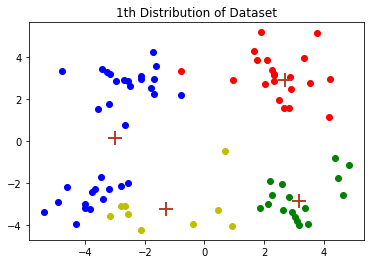

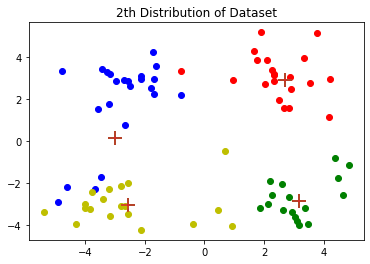

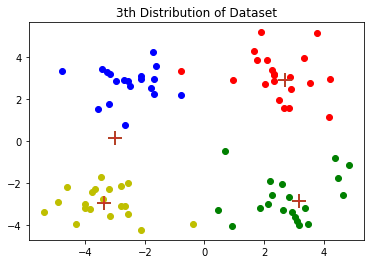

In [114]:
num_data = dataset.shape[0]

cluster_per_point = np.ones((num_data))

counter = 0
while True:
    prev_cluster_per_point = cluster_per_point    

    # (2) 중심점과 각 데이터 사이의 거리를 계산
    dists = np.vstack([np.sqrt(np.sum((dataset-centroids[0:1])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[1:2])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[2:3])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[3:4])**2, axis=1))])## fix me ##
        
    # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
    ## fix me ##
    cluster_per_point = np.argmin(dists, axis=0)## fix me ##
    # (4) 각 군집 별 점들의 평균을 계산 후, 군집의 중심점을 다시 계산
    ## fix me ##            
    target_point = dataset[cluster_per_point==i] ## fix me ##
    centroids[i] = np.mean(target_point,axis=0) 
    ## (5) cluster 값이 변하지 않으면 while 구문을 종료(np.all 구문 사용)
    if np.all(prev_cluster_per_point == cluster_per_point): ## fix me##:
        break
        
    # 시각화 코드 
    counter += 1
    plt.title("{}th Distribution of Dataset".format(counter))
    for idx, color in enumerate(['r','g','b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(dataset[mask,0],dataset[mask,1],
                    label='dataset', c=color)
        plt.scatter(centroids[:,0],centroids[:,1],
                    s=200, label="centroid", marker='+')
    plt.show()


## 2. 전체 Numpy Code 작성하기
* 위에서 작성한 코드를 하나로 묶어 function 으로 생성합니다.

In [146]:
def cluster_kmeans(dataset, k):
    center_x = np.random.uniform(-6,6,4) ## fix me ##
    center_y = np.random.uniform(-6,6,4)## fix me ## 
    centroids = np.stack([center_x,center_y],axis=-1)
        
    dists = np.vstack([np.sqrt(np.sum((dataset-centroids[0:1])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[1:2])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[2:3])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[3:4])**2, axis=1))])
    cluster_per_point = np.argmin(dists, axis=0)
    k = 4 
    for i in range(k):    
        target_point = dataset[cluster_per_point==i] 
        centroids[i] = target_point.mean(axis=0)
        
    num_data = dataset.shape[0]
    cluster_per_point = np.ones((num_data))
    counter = 0
    while True:
        prev_cluster_per_point = cluster_per_point
        dists = np.vstack([np.sqrt(np.sum((dataset-centroids[0:1])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[1:2])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[2:3])**2, axis=1)),np.sqrt(np.sum((dataset-centroids[3:4])**2, axis=1))])## fix me ##
        cluster_per_point = np.argmin(dists, axis=0)
        target_point = dataset[cluster_per_point==i] 
        centroids[i] = np.mean(target_point,axis=0) 
        if np.all(prev_cluster_per_point == cluster_per_point): 
            break
        
        counter += 1
        plt.title("{}th Distribution of Dataset".format(counter))
        for idx, color in enumerate(['r','g','b','y']):
            mask = (cluster_per_point==idx)
            plt.scatter(dataset[mask,0],dataset[mask,1],
                           label='dataset', c=color)
            plt.scatter(centroids[:,0],centroids[:,1],
                           s=200, label="centroid", marker='+')
        plt.show()
    return centroids

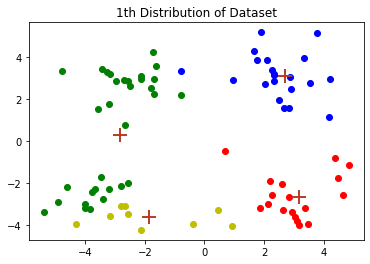

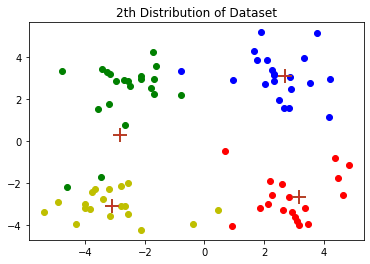

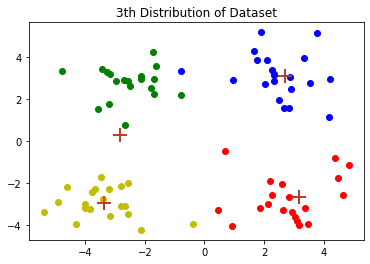

array([[ 3.17492412, -2.67657444],
       [-2.82329087,  0.28049374],
       [ 2.71358074,  3.11839563],
       [-3.38237045, -2.9473363 ]])

In [147]:
cluster_kmeans(dataset,4)